In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
import time

In [41]:
dataset = pd.read_csv("Final_merged_data.csv", sep=",")

# Country is not needed
dataset_final = dataset.drop('Country', axis=1)
dataset_final

,Year,Item,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
0,2010,"Abaca, manila hemp, raw",190.783333,26.6,8275,313639.25
1,2010,Areca nuts,190.783333,26.6,12623,313639.25
2,2010,Avocados,190.783333,26.6,109367,313639.25
3,2010,Bananas,190.783333,26.6,568256,313639.25
4,2010,"Beans, dry",190.783333,26.6,11300,313639.25
...,...,...,...,...,...,...
715,2021,Tea leaves,199.550000,26.8,50244,283297.13
716,2021,Tomatoes,199.550000,26.8,187605,283297.13
717,2021,Unmanufactured tobacco,199.550000,26.8,11544,283297.13
718,2021,"Vanilla, raw",199.550000,26.8,1528,283297.13


In [42]:
# get the features (x) and target variable (y)
X = dataset_final.drop('Yield (hg/ha)', axis=1)
Y = dataset_final['Yield (hg/ha)']

In [43]:
# perform one hot encoding
X_enc = pd.get_dummies(dataset_final, columns=['Item'])

In [44]:
# to get your data into two subset
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y, test_size=0.2, random_state=42)

In [45]:
start_training_time = time.time()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time


start_pred_time = time.time()
Y_pred = regressor.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 0.01 seconds
Prediction Time: 0.00672 seconds


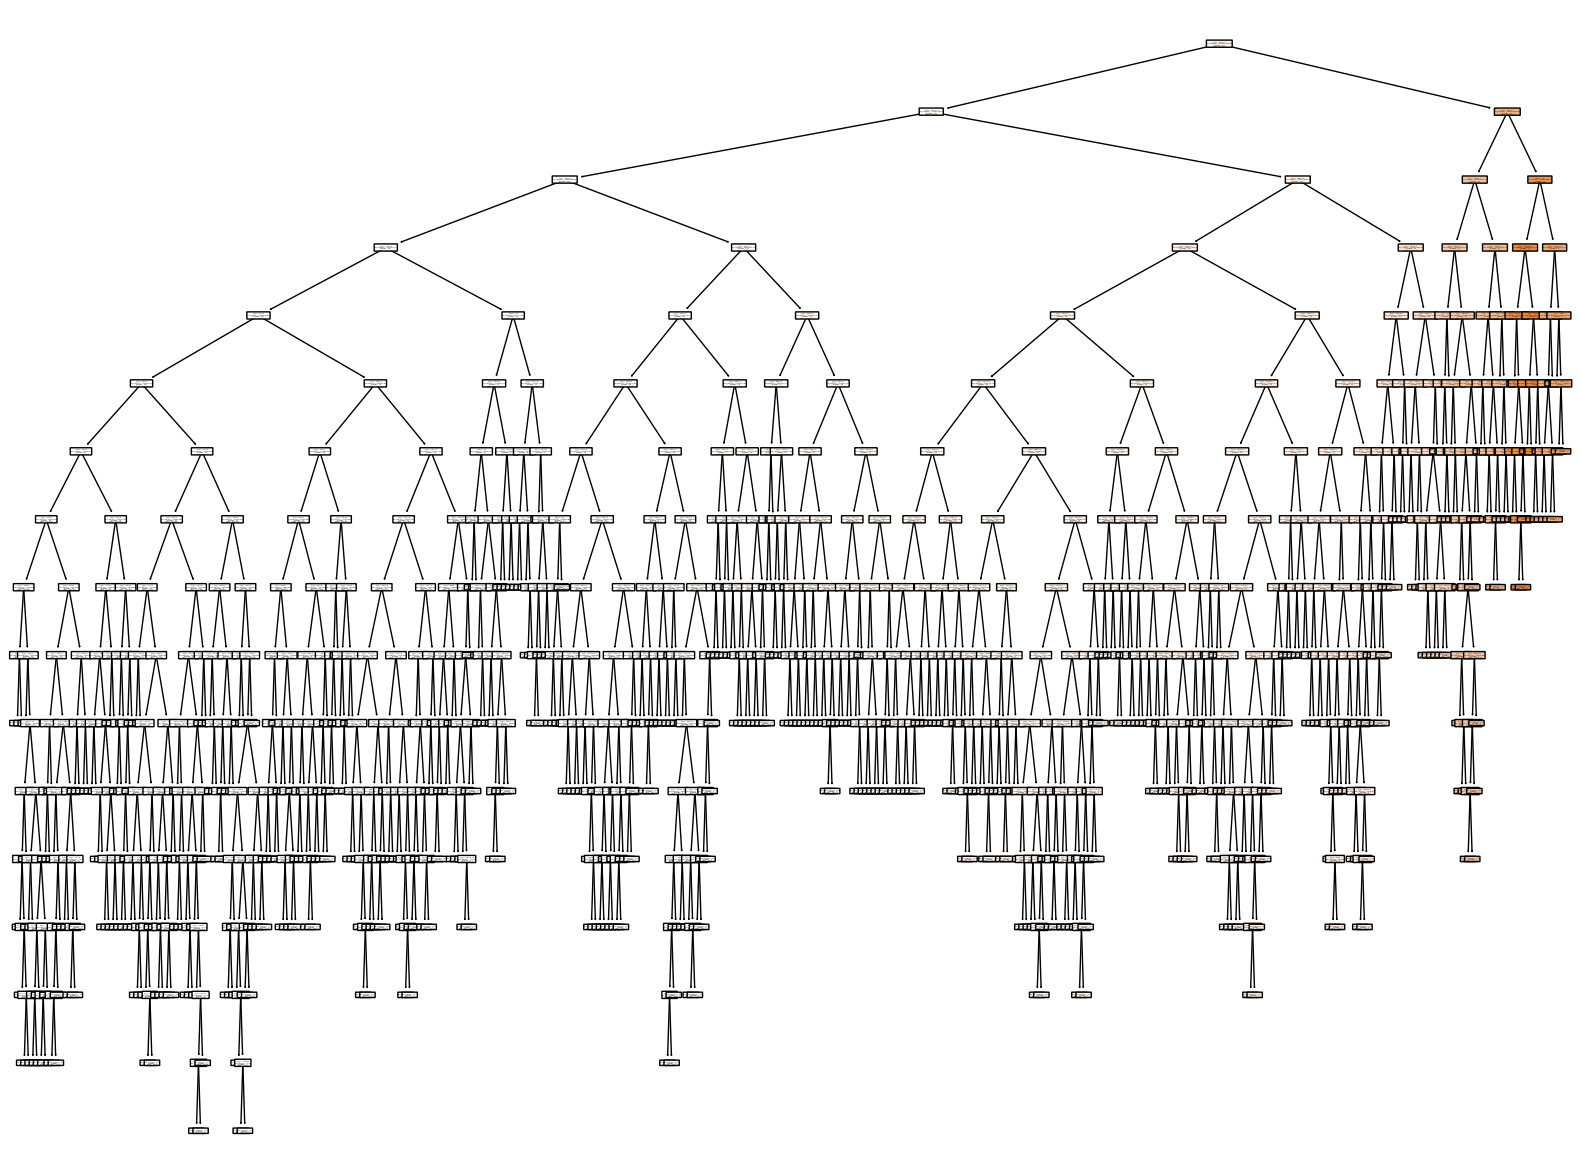

In [46]:
plt.figure(figsize=(20, 15))
plot_tree(regressor, filled=True, rounded=True)
plt.show()

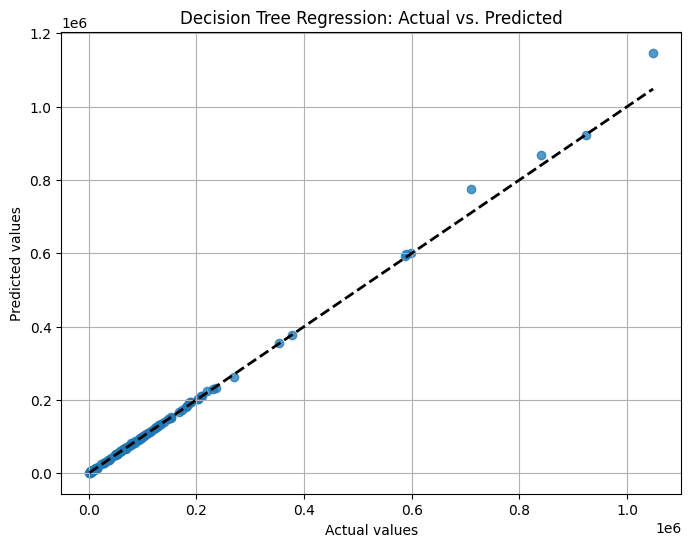

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test,Y_pred, alpha=0.75)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Decision Tree Regression: Actual vs. Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error

In [49]:
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
max_err = max_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared (R2): 1.00
Mean Absolute Error (MAE): 2068.90
Mean Squared Error (MSE): 104285033.03
Root Mean Squared Error (RMSE): 10212.00
Max Error: 98759.00
Mean Absolute Percentage Error (MAPE): 0.01%
